In [1]:
# { 1 } 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from numpy import median


%run Feature_enrich.py           # PY File containing all functions pertaining to the calculation of technical indiciators 
%run BackTestingCode_ATS.py      # PY File containing all functions used in assessing ...
                                 # ... the performance of each strategy on past data
%run Data_Extraction.py          # PY File containing all functions used to extract information from the "Data_Tables" Xlsx
%run SwitchMLSignals.py          # Converts ML classification and regressions output to an array of signals (-1,0,1)
%run ML_Signal.py                # PY File containing all functions used to run and build ML indicators
warnings.simplefilter('ignore')  # Suppress erroneous input warnings

In [2]:
# { 1 } 
# Downloading all respective data and merging to create one single dataset
Database = pd.read_excel('Commodity Data.xlsx', index_col= 0)
Econ1 = getATSData()
Econ2 = pd.read_csv('Fama_French.csv')
Econ2.index = pd.to_datetime(list(Econ2['date']))
Econ2 = Econ2.drop(columns=['date'])
Econ_factors = pd.merge(Econ1, Econ2, left_index= True, right_index= True, how= 'inner')

Reading sheet FX SPOT
Reading sheet ATM VOLS
Reading sheet 3M 25D RR
Reading sheet 3M DEPOSIT RATES
Reading sheet 10Y YIELD
Reading sheet EQUITY INDICES
Reading sheet COMDTY
Reading sheet CREDIT SPREADS
Reading sheet IMM POSITIONING
Reading sheet JPM EASI


In [3]:
# { 1 } 
# Initialising lists for calculating the sumary statistics
commodities = Database.columns
start_date = []
end_date = []
obs_num = []
mean_Ret = []
std_Ret = []
Ret_Skew = []
Ret_Max = []
# Calculate each statistic using the respective standardised functions
for items in commodities:
    Price_series = Database[items].dropna()
    start_date.append(Price_series.index[0])
    end_date.append(Price_series.index[-1])
    obs_num.append(Price_series.shape[0])
    mean_Ret.append(Price_series.pct_change().mean()*100)
    std_Ret.append(Price_series.pct_change().std()*100)
    Ret_Skew.append(Price_series.pct_change().skew())
    Ret_Max.append(Price_series.pct_change().max())
# Merge the aforementioned statistics into a single table
summarise_table = pd.DataFrame({"Data_start_from": start_date,
                                "Data_ends_at" : end_date,
                               "obs_number": obs_num,
                               "mean_Ret": mean_Ret,
                               "Return_StanDev": std_Ret,
                               "Return_skewness": Ret_Skew,
                               "Ret_Max": Ret_Max})

# Print the table to observe format and summary statistics
summarise_table = summarise_table.set_index(commodities)
summarise_table

,Data_start_from,Data_ends_at,obs_number,mean_Ret,Return_StanDev,Return_skewness,Ret_Max
Wheat,1969-12-31,2012-12-31,11219,-0.001315,1.625488,0.183087,0.091926
Feeder Cattle,2002-01-07,2012-12-31,2866,0.008941,0.894824,-0.228405,0.034120
Kansas wheat,1999-01-08,2012-12-31,3647,-0.001269,1.760899,0.163068,0.084346
Live Cattle,1969-12-31,2012-12-31,11219,0.016443,1.007238,-0.080416,0.042589
Coffee,1981-01-07,2012-12-31,8344,0.003928,2.174425,0.543208,0.261514
Cotton,1977-01-07,2012-12-31,9387,0.001508,1.447139,0.061043,0.071791
Soybeans,1969-12-31,2012-12-31,11219,0.023942,1.485274,-0.054190,0.114905
Sugar,1973-01-08,2012-12-31,10431,0.015140,2.378670,0.011620,0.152548
Cocoa,1984-01-06,2012-12-31,7562,-0.015255,1.838758,0.128137,0.129191
Corn,1969-12-31,2012-12-31,11219,-0.004903,1.438050,0.162694,0.090480


In [4]:
# { 2 } 
# Create a dataset to develop the commodity index
Commodity_Index = pd.DataFrame({"Commodity level": 0}, index= Database.index)
Commodity_Index.iloc[0] = 100
temp1 = Database.pct_change()
iterator = 100
for days in Commodity_Index.index[1:]:
    pct_change = temp1.loc[days].dropna().mean()
    Commodity_Index.loc[days] = iterator*(1+pct_change)
    iterator = Commodity_Index.loc[days]

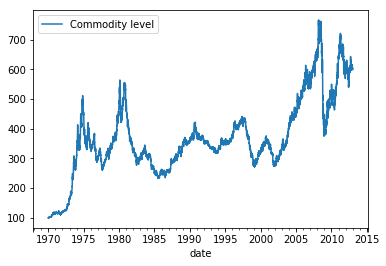

In [5]:
# { 2 } 
# Plot commodity market factor 
Commodity_Index.plot()

Text(0,0.5,'Second principal component of returns')

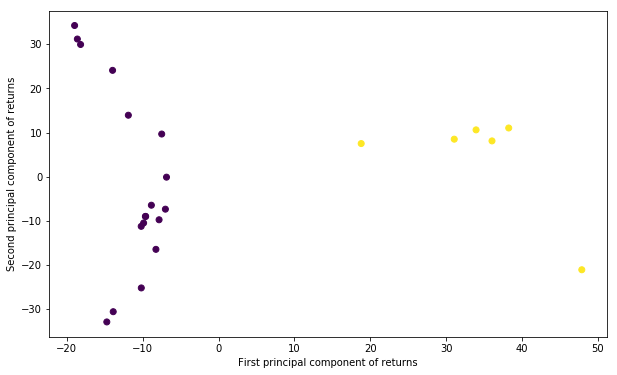

In [6]:
# { 3, 4 & 7 } 
# Break up Dataset into clusters
# Calculates PCA's from clustering
return_matrix = pd.DataFrame()
for items in commodities:
    return_matrix[items] = Database[items].pct_change()
    
df = return_matrix.dropna().transpose()
k = 2
X = (df - df.mean())/df.std()
X = X.dropna(axis= 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
L = kmeans.labels_
Z = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(Z[:,0],Z[:,1],c=L)
plt.xlabel('First principal component of returns')
plt.ylabel('Second principal component of returns')

In [7]:
# { 3, 4 & 7 } 
# Break up Dataset into clusters
return_clusters = {}
for clusters in range(k):
    return_clusters[clusters] = df[L == clusters].index
    print(len(return_clusters[clusters]))
    
def Future_Classifying(price1):
    price = price1.copy()
    price['Week_return'] = (price['<CLOSE>'].shift(5)/price['<CLOSE>'] - 1)
    price1['Week_return'] = price['Week_return']
    price['Outcome_Class'] = 0
    price['Outcome_Class'].loc[price['Week_return'] > 0.1] = 3
    price['Outcome_Class'].loc[(price['Week_return'] > 0.05) & (price['Week_return'] <= 0.1)] = 2
    price['Outcome_Class'].loc[(price['Week_return'] > 0) & (price['Week_return'] <= 0.05)] = 1
    price['Outcome_Class'].loc[(price['Week_return'] > -0.05) & (price['Week_return'] <= 0)] = -1
    price['Outcome_Class'].loc[(price['Week_return'] > -0.1) & (price['Week_return'] <= -0.05)] = -2
    price['Outcome_Class'].loc[(price['Week_return'] <- 0.1)] = -3
    price1['Outcome_Class'] = price['Outcome_Class']
    Generate_pool(price1)
    return price1


18
6


In [8]:
# { 3, 4 & 7 } 
# Break up Dataset into clusters
# Define Cluster 1
Cluster_0 = return_clusters[0]
df_cluster_0 = pd.DataFrame()

for items in Cluster_0:
    price = pd.DataFrame(Database[items])
    price.columns = ['<CLOSE>']
    price = price.dropna()
    price = Future_Classifying(price)
    price['Symbol'] = items
    df_cluster_0 = pd.concat([df_cluster_0,price])   

df_cluster_0 = df_cluster_0.set_index([pd.to_datetime(df_cluster_0.index), 'Symbol']).sort_index()

In [9]:
# { 3, 4 & 7 } 
# Break up Dataset into clusters
# Define Cluster 2
Cluster_1 = return_clusters[1]
df_cluster_1 = pd.DataFrame()

for items in Cluster_1:
    price = pd.DataFrame(Database[items])
    price.columns = ['<CLOSE>']
    price = price.dropna()
    price = Future_Classifying(price)
    price['Symbol'] = items
    df_cluster_1 = pd.concat([df_cluster_1,price])   

df_cluster_1 = df_cluster_1.set_index([pd.to_datetime(df_cluster_1.index), 'Symbol']).sort_index()

In [10]:
# { 3, 4 & 7 } 
# Dropping irrelevant rows where signals are first being generated
remove = pd.unique(df_cluster_0.index.get_level_values(0))[0:40]
df_cluster_0 = df_cluster_0.drop(remove, level= 0)
df_cluster_1 = df_cluster_1.drop(remove, level= 0)

In [11]:
# { 3 & 4 } 
# Function used to calculate signal from depending on 
# ... how many indicators need to agree "criteria"
def Signal_combine(data, use, criteria =0):
    data1 = data.copy()
    if criteria == 0:
         criteria = int(len(use)/2)
    data1['combined_signal'] = data[use].sum(axis = 1)
    data['combined_signal'] = (data1['combined_signal'].abs() >= criteria).astype(int) * np.sign(data1['combined_signal'])
    return data

0.4022657157295192
Initial Deposit       :  1000000
Final Equity          :  7937789.697083887
Final Equity 2        :  7937789.69708387
Total NET Profit      :  6937789.697083887
Total Trades          :  71360
 (%) Long V Short Pos :  0.39641850485899793
 Total Win Rate       :  0.40337395352750627
 Avg Win Amount       :  6302.974844058684
 Avg Loss Amount      :  4098.317157043079
 Kelly Criterion      :  0.015436063389508314
 Absolute Drawdown    :  53626.338957001455
 Maximal Drawdown     :  1075752.545724012

Total Long Trades     :  28269
   (%) Long Wins      :  0.5188015140259649
   Total Long Win Am  :  91897345.70223111
   Avg Long Win Am    :  6266.012934830977
   Total Long Loss Am :  85976729.39327906
   Avg Long Loss Am   :  6320.4241265367245

Total Short Trades    :  43042
   (%) Short Wins     :  0.3275637749175224
   Total Short Win Am :  89407725.68711694
   Avg Short Win Am   :  6341.423199313209
   Total Short Loss Am:  88390272.37027575
   Avg Short Loss Am  :  3

()

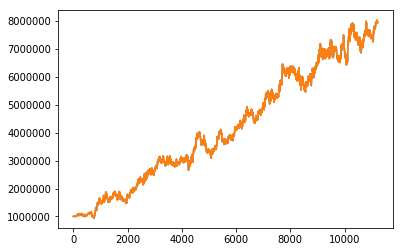

In [12]:
# { 3 & 4 } 
# ################## THIS CELL HAS GIVEN US ALL OF OUR BACK TESTING RESULTS ##################
# Declare Combination of Indicators and arrays for prices / signals
use = ['momentum','ema_Signal']   # Update "use" with the required indicators you wish to study
All_Prices = []
All_Highs = []
All_Lows = []
AllSignals = []
totalsignals = 0
long = pd.DataFrame(index = Database.index)
# Build arrays for prices / signals and combine them into a list of lists
for items in commodities:
    if items in df_cluster_0.index.levels[1]:
        # continue    # When wanting to study the affects of individual clusters, activate the "continue" on this line
        temp = df_cluster_0.xs(items, level= 'Symbol')
    else:
        # continue    # When wanting to study the affects of individual clusters, activate the "continue" on this line
        temp = df_cluster_1.xs(items, level= 'Symbol')
    temp['momentum'] = (temp['momentum'].abs()>=0.03).astype(int) * np.sign(temp['momentum'])
    temp = temp.merge(long, left_index= True, right_index= True, how = 'outer')
    temp = temp.fillna(0)
    All_Prices.append(list(temp['<CLOSE>'].values))
    All_Highs.append(list(temp['<CLOSE>'].values))
    All_Lows.append(list(temp['<CLOSE>'].values))
    temp = Signal_combine(temp, use, criteria= 1)
    AllSignals.append(list(temp['combined_signal']))
    totalsignals = totalsignals + (temp['combined_signal']!= 0).sum()

# Call the backtesting function to calculate no. of trade wins / losses, PNL ...
# ... total equity change... 
Strat1 = MainFunc(AllSignals, All_Prices, All_Highs, All_Lows)
# Calculates the sharpe ratio of strategy
Equity = pd.DataFrame(Strat1[7], index= long.index)
Annual_ret = Equity.pct_change().dropna().mean()[0]*250
Annual_std = Equity.pct_change().dropna().std()[0]*(250**0.5)
Sharpe = (Annual_ret - 0.01)/Annual_std
print(Sharpe)
# Calculates summary statistics and findings of backtest in an aesthetic format
PrettyOutput(Strat1)

In [13]:
# { 4 }
# Calculates summary statistics of commodity market factor in an aesthetic format
mean_ret_comm=Commodity_Index['Commodity level'].pct_change().mean()*100
std_ret_comm=Commodity_Index['Commodity level'].pct_change().std()*100
Ret_Skew_comm=Commodity_Index['Commodity level'].pct_change().skew()
Ret_Max_comm=Commodity_Index['Commodity level'].pct_change().max()

summarise_commodity=pd.DataFrame({"mean_Ret": mean_ret_comm,
                                "Return_StanDev": std_ret_comm,
                                "Return_skewness": Ret_Skew_comm,
                                "Ret_Max": Ret_Max_comm},index=['Commodity Market Factor'])
summarise_commodity

,mean_Ret,Return_StanDev,Return_skewness,Ret_Max
Commodity Market Factor,0.019743,0.868866,-0.119675,0.064519


In [ ]:
# { 6 }
# Run a regression of your strategy returns on the commodity market factor...
# ... to calculate the sensitivity with respect to the commodity market
reg_x = Commodity_Index.pct_change().dropna()
reg_y = pd.DataFrame({'NAV': Strat1[7]},index=Database.index).pct_change().dropna()
reg = LinearRegression()
reg.fit(reg_x, reg_y)
# The coefficients
print('Coefficients: \n', reg.coef_)
reg_y_pred=reg.predict(reg_x)
reg_y_pred

print("R squared : ", reg.score(reg_x,reg_y))
plt.scatter(reg_x, reg_y)

plt.plot(reg_x, reg_y_pred, color='red')

plt.show()

In [ ]:
# { 8 }
# Prepare datasets according to clusters for Machine Learning applications
MEGA_POOL_0 = df_cluster_0.merge(Econ_factors, left_on= 'date', right_index= True,  how='inner')
MEGA_POOL_1 = df_cluster_1.merge(Econ_factors, left_on= 'date', right_index= True,  how='inner')

In [ ]:
# { 8 }
# Observing when different indicators become live for Machine Learning applications
Data_start = {}
time_line = []
for indicators in Econ_factors.columns:
    date = Econ_factors[indicators].dropna().index[0]
    if date in Data_start.keys():
        Data_start[date].append(indicators)
        time_line.append(date)
    else:
        Data_start[date] = [indicators]
        time_line.append(date)

n = 0
initial = '2000-01-01'
for times in time_line:
    if times <= pd.to_datetime([initial]):
        n+=1
print('within ' + str(len(time_line)) + ' factors there are '+ str(n) + ' indicators started before ' + initial)

In [ ]:
# { 8 }
# Further pre-processing data for Machine Learning applications and align predictions
start = '2000-01-01'
def Data_construct(ones, num = True):
    if ones == 0:        
        Pool_use = MEGA_POOL_0[MEGA_POOL_0.index.get_level_values(0) >= pd.to_datetime(start)]
    if ones == 1:
        Pool_use = MEGA_POOL_1[MEGA_POOL_1.index.get_level_values(0) >= pd.to_datetime(start)]
    remove_columns= []
    for days in Data_start.keys():
        if days >= pd.to_datetime('2000-01-01'):
            remove_columns+=Data_start[days]    
    Pool_use = Pool_use.drop(remove_columns, axis= 1).fillna(0)
    if num:
        Pool_use = Pool_use.drop('Outcome_Class', axis = 1)
    else: 
        Pool_use = Pool_use.drop('Week_return', axis = 1)
    Pool_use = Pool_use.reset_index(level = 'Symbol')
    Pool_use = Pool_use.drop(columns="<CLOSE>")      
    Pool_use = Pool_use.replace(np.inf, 0)  
    Pool_use = Pool_use.replace(-np.inf, 0)  
    Pool_use.iloc[:,4:] = (Pool_use.iloc[:,4:] -Pool_use.iloc[:,4:].mean())/Pool_use.iloc[:,4:].std()
    Index = Match_Index(Pool_use)
    return Pool_use, Index

def Match_Index(Data_used, start = 251, every = 5):
    Days = pd.unique(Data_used.index)[start:]
    Pred_days = Days[::every]
    return pd.DataFrame(Data_used['Symbol'].loc[Pred_days])

In [ ]:
# { 8 }
# Final pre-processing of datasets by clusters
# Cluster 0 ~ Agriculture, Metal and Livestock [Non-Energy]
Pool1, Pred_cat = Data_construct(0, num = False)
Pool1_num, Pred_num = Data_construct(0) 
Input1 = Pool1.drop('Symbol', axis = 1)
Input1_num = Pool1_num.drop('Symbol', axis = 1)
# Cluster 1 ~ Energy 
Pool2, Pred_cat_2 = Data_construct(1, num = False)
Pool2_num, Pred_num_2 = Data_construct(1) 
Input2 = Pool2.drop('Symbol', axis = 1)
Input2_num = Pool2_num.drop('Symbol', axis = 1)

# Machine Training (computationally expensive)
The following two cells fits the machine learning models. The two cells follows collects the predictions. We trained two ML codes to make categorical predictions and two to make numerical predictions, both in terms of following week's return
## { 8 } 

In [ ]:
P1, T1 = Lasso_CV(Input1_num)
Pred_num['LASSO'] = P1
P2, T2 = RF_CV(Input1)
Pred_cat['Random_Forest'] = P2
P3, T3 = EN_CV(Input1_num)
Pred_num['Elastic_Net'] = P3
P4, T4 = KNN_CV(Input1)
Pred_cat['KNN'] = P4

In [ ]:
P21, T21 = Lasso_CV(Input2_num)
Pred_num_2['LASSO'] = P21
P22, T22 = RF_CV(Input2)
Pred_cat_2['Random_Forest'] = P22
P23, T23 = EN_CV(Input2_num)
Pred_num_2['Elastic_Net'] = P23
P24, T24 = KNN_CV(Input2)
Pred_cat_2['KNN'] = P24

In [ ]:
ML_Signals = pd.DataFrame(Pred_cat['Symbol'])
ML_Signals['Random_Forest'] = AllocateSignals(Pred_cat['Random_Forest'].values)
ML_Signals['KNN'] = AllocateSignals(Pred_cat['KNN'].values)
ML_Signals['LASSO'] = AllocateSignals(Pred_num['LASSO'].values, ClassOrReg= 0.03)
ML_Signals['EN'] = AllocateSignals(Pred_num['LASSO'].values, ClassOrReg= 0.03)
ML_Signals = ML_Signals.set_index([pd.to_datetime(ML_Signals.index), 'Symbol']).sort_index()

In [ ]:
ML_Signals_2 = pd.DataFrame(Pred_cat_2['Symbol'])
ML_Signals_2['Random_Forest'] = AllocateSignals(Pred_cat_2['Random_Forest'].values)
ML_Signals_2['KNN'] = AllocateSignals(Pred_cat_2['KNN'].values)
ML_Signals_2['LASSO'] = AllocateSignals(Pred_num_2['LASSO'].values, ClassOrReg= 0.03)
ML_Signals_2['EN'] = AllocateSignals(Pred_num_2['LASSO'].values, ClassOrReg= 0.03)
ML_Signals_2 = ML_Signals_2.set_index([pd.to_datetime(ML_Signals_2.index), 'Symbol']).sort_index()

# A Signal grid_search
Following two cells test the performance of using just ML signals and using them in conjunction with traditional Technical indicators respecitvely
## { 8 }

In [ ]:
ML_List = ['Random_Forest', 'EN', 'KNN', 'LASSO']
for L in range(1, len(ML_List)+1):
    for subset in itertools.combinations(ML_List, L):
        use = list(subset)
        All_Prices = []
        All_Highs = []
        All_Lows = []
        AllSignals = []
        totalsignals = 0
        commodities = ML_Signals.index.levels[1]
        long = pd.DataFrame(index = pd.unique(ML_Signals.index.get_level_values(0)))
        for items in commodities:
            if items in df_cluster_0.index.levels[1]:
                temp = df_cluster_0.xs(items, level= 'Symbol')
            else: 
                temp = df_cluster_1.xs(items, level= 'Symbol')
            temp1 = ML_Signals.xs(items, level= 'Symbol')
            temp = temp.merge(temp1, left_index= True, right_index= True, how = 'inner', copy= False)
            temp = temp.merge(long, left_index= True, right_index = True, how = 'outer')
            temp = temp.fillna(0)

            All_Prices.append(list(temp['<CLOSE>'].values))
            All_Highs.append(list(temp['<CLOSE>'].values))
            All_Lows.append(list(temp['<CLOSE>'].values))
            temp = Signal_combine(temp, use, criteria= 1)
            AllSignals.append(list(temp['combined_signal']))
            totalsignals = totalsignals + (temp['combined_signal']!= 0).sum()

        Strat1 = MainFunc(AllSignals, All_Prices, All_Highs, All_Lows)
        Equity = pd.DataFrame(Strat1[7], index= long.index)
        Annual_ret = Equity.pct_change().dropna().mean()[0]*250
        Annual_std = Equity.pct_change().dropna().std()[0]*(250**0.5)
        Sharpe = (Annual_ret - 0.01)/Annual_std
        print('the combination of '+ str(use) + ' produces a sharpe ratio of ' + str(Sharpe))


In [ ]:
sharpe_record = []
Combination_record = []
C_record = []
Return_record = []
Vol_record = []
Try_List = ['Random_Forest', 'EN', 'KNN', 'momentum', 'MACD','Bollinger', 'RSI','TRIX']
for L in range(1, len(Try_List)+1):
    for subset in itertools.combinations(Try_List, L):
        use = list(subset)
        if len(use) <=2:
            C = 1
        elif len(use) <= 5:
            C = 2
        else:
            C = 3
        All_Prices = []
        All_Highs = []
        All_Lows = []
        AllSignals = []
        totalsignals = 0
        commodities = ML_Signals.index.levels[1]
        long = pd.DataFrame(index = pd.unique(ML_Signals.index.get_level_values(0)))
        for items in commodities:
            if items in df_cluster_0.index.levels[1]:
                temp = df_cluster_0.xs(items, level= 'Symbol')
            else: 
                temp = df_cluster_1.xs(items, level= 'Symbol')
            temp['momentum'] = (temp['momentum'].abs()>=0.03).astype(int) * np.sign(temp['momentum'])
            temp1 = ML_Signals.xs(items, level= 'Symbol')
            temp = temp.merge(temp1, left_index= True, right_index= True, how = 'inner', copy= False)
            temp = temp.merge(long, left_index= True, right_index = True, how = 'outer')
            temp = temp.fillna(0)

            All_Prices.append(list(temp['<CLOSE>'].values))
            All_Highs.append(list(temp['<CLOSE>'].values))
            All_Lows.append(list(temp['<CLOSE>'].values))
            temp = Signal_combine(temp, use, criteria= C)
            AllSignals.append(list(temp['combined_signal']))
            totalsignals = totalsignals + (temp['combined_signal']!= 0).sum()

        Strat1 = MainFunc(AllSignals, All_Prices, All_Highs, All_Lows)
        Equity = pd.DataFrame(Strat1[7], index= long.index)
        Annual_ret = Equity.pct_change().dropna().mean()[0]*250
        Annual_std = Equity.pct_change().dropna().std()[0]*(250**0.5)
        Sharpe = (Annual_ret - 0.01)/Annual_std
        sharpe_record.append(Sharpe)
        Combination_record.append(use)
        C_record.append(C)
        Return_record.append(Annual_ret)
        Vol_record.append(Annual_std)

In [ ]:
Result = pd.DataFrame({'Sharpe' : sharpe_record, 'Combination' : Combination_record, 
                       'Return': Return_record, 'Vol': Vol_record, 'Agree': C_record})
Result.sort_values('Sharpe', ascending= False, inplace= True)
Result

In [ ]:
# Back test the best combination of Technical and Machine Learning indicators, same function used earlier
use = ['EN', 'MACD']
C = 1
All_Prices = []
All_Highs = []
All_Lows = []
AllSignals = []
totalsignals = 0
commodities = ML_Signals.index.levels[1]
long = pd.DataFrame(index = pd.unique(ML_Signals.index.get_level_values(0)))
for items in commodities:
    if items in df_cluster_0.index.levels[1]:
        temp = df_cluster_0.xs(items, level= 'Symbol')
    else: 
        temp = df_cluster_1.xs(items, level= 'Symbol')
    temp['momentum'] = (temp['momentum'].abs()>=0.03).astype(int) * np.sign(temp['momentum'])
    temp1 = ML_Signals.xs(items, level= 'Symbol')
    temp = temp.merge(temp1, left_index= True, right_index= True, how = 'inner', copy= False)
    temp = temp.merge(long, left_index= True, right_index = True, how = 'outer')
    temp = temp.fillna(0)

    All_Prices.append(list(temp['<CLOSE>'].values))
    All_Highs.append(list(temp['<CLOSE>'].values))
    All_Lows.append(list(temp['<CLOSE>'].values))
    temp = Signal_combine(temp, use, criteria= C)
    AllSignals.append(list(temp['combined_signal']))
    totalsignals = totalsignals + (temp['combined_signal']!= 0).sum()
Strat1 = MainFunc(AllSignals, All_Prices, All_Highs, All_Lows)
PrettyOutput(Strat1)

In [ ]:
reg_x = Commodity_Index.loc[pd.to_datetime(long.index)].pct_change().dropna()
reg_y = pd.DataFrame({'NAV': Strat1[7]},index=long.index).pct_change().dropna()
reg = LinearRegression()
reg.fit(reg_x, reg_y)
# The coefficients
print('Coefficients: \n', reg.coef_)
reg_y_pred=reg.predict(reg_x)
reg_y_pred

plt.scatter(reg_x, reg_y)

plt.plot(reg_x, reg_y_pred, color='red')

plt.show()